In [ ]:
import pandas as pd
import numpy as np

from plotnine import ggplot, aes, geom_histogram, geom_density, geom_boxplot, theme_bw
from plotnine.data import mpg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import fisher_exact, chi2_contingency

import random
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import *

In [ ]:
# loading dataset
healthData = pd.read_csv("/healthcare-dataset-stroke-data.csv")

In [ ]:
set(list(healthData.stroke))

{0, 1}

In [ ]:
# sample rows
print("Sample Rows from Health Dataset\n")
healthData.head()

Sample Rows from Health Dataset



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# checking for NA values
healthData.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [ ]:
# Data wrangling
print("Data wrangling is started\n")

# converting "N/A" to NA
healthData['bmi'] = healthData['bmi'].apply(lambda x: x if x != 'N/A' else None)

Data wrangling is started



In [ ]:
mean_bmi = np.mean(healthData['bmi'])
healthData['bmi'] = np.where(np.isnan(healthData['bmi']), mean_bmi, healthData['bmi'])

In [ ]:
# checking for NA values after coverting
healthData.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [ ]:
# converting into numeric value
healthData['bmi'] = pd.to_numeric(healthData['bmi'])
healthData['stroke'] = pd.Categorical(healthData['stroke'])
healthData['hypertension'] = pd.Categorical(healthData['hypertension'])
healthData['heart_disease'] = pd.Categorical(healthData['heart_disease'])

In [ ]:
print("Descriptive analysis of dataset\n")
print("Dimensions\n")
print(healthData.shape)

Descriptive analysis of dataset

Dimensions

(5110, 12)


In [ ]:
print("Summary\n")
print(healthData.describe())

Summary

                 id          age  avg_glucose_level          bmi
count   5110.000000  5110.000000        5110.000000  5110.000000
mean   36517.829354    43.226614         106.147677    28.893237
std    21161.721625    22.612647          45.283560     7.698018
min       67.000000     0.080000          55.120000    10.300000
25%    17741.250000    25.000000          77.245000    23.800000
50%    36932.000000    45.000000          91.885000    28.400000
75%    54682.000000    61.000000         114.090000    32.800000
max    72940.000000    82.000000         271.740000    97.600000


In [ ]:
print("Sample Rows from Health Dataset post preprocessing\n")
healthData.head()

Sample Rows from Health Dataset post preprocessing



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
# EDA
print("EDA")
p = (healthData.loc[healthData['gender'] != 'Other']
     .groupby(['gender', 'stroke'])
     .agg(n=('gender', 'count'),
          Average_age=('age', 'median'),
          smoking_share=('smoking_status', lambda x: round(sum(x.isin(['formerly smoked', 'smokes'])) / len(x), 2))
         )
     .reset_index()
    )
p.head()

EDA


,gender,stroke,n,Average_age,smoking_share
0,Female,0,2853,43.0,0.31
1,Female,1,141,72.0,0.38
2,Male,0,2007,44.0,0.34
3,Male,1,108,70.5,0.55


In [ ]:

print(round(healthData[['age', 'avg_glucose_level', 'bmi']].describe(), 2))


           age  avg_glucose_level      bmi
count  5110.00            5110.00  5110.00
mean     43.23             106.15    28.89
std      22.61              45.28     7.70
min       0.08              55.12    10.30
25%      25.00              77.24    23.80
50%      45.00              91.88    28.40
75%      61.00             114.09    32.80
max      82.00             271.74    97.60


In [ ]:
p = healthData.loc[(healthData['work_type'] == 'Private') & (healthData['stroke'] == 1)]
p.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


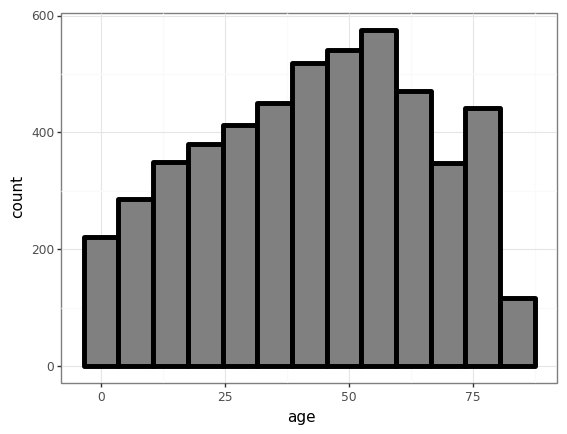

<ggplot: (8760279153502)>

In [ ]:
# Data visualization
(ggplot(healthData, aes(x='age')) +
 geom_histogram(fill='gray', color='black', binwidth=7, size=2) + theme_bw())

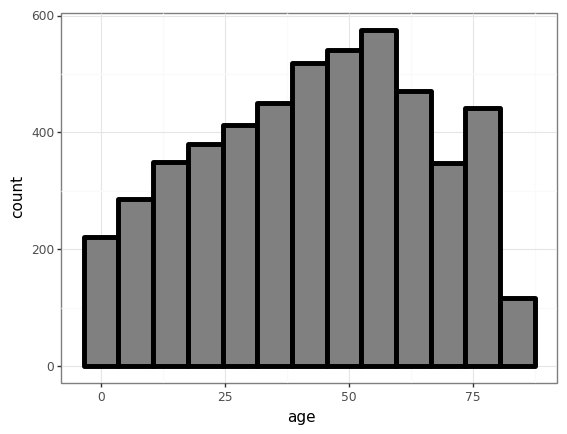

<ggplot: (8760279053779)>

In [ ]:
# Histogram of age
(ggplot(healthData, aes(x='age'))
 + geom_histogram(fill='gray', color='black', binwidth=7, size=2)
 + theme_bw()
)

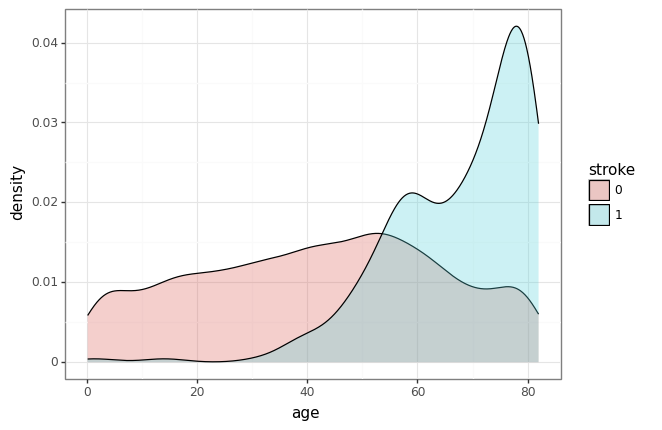

<ggplot: (8760276369951)>

In [ ]:
# Density plot of age by stroke status
(ggplot(healthData, aes(x='age', fill='stroke'))
 + geom_density(alpha=0.3)
 + theme_bw()
)


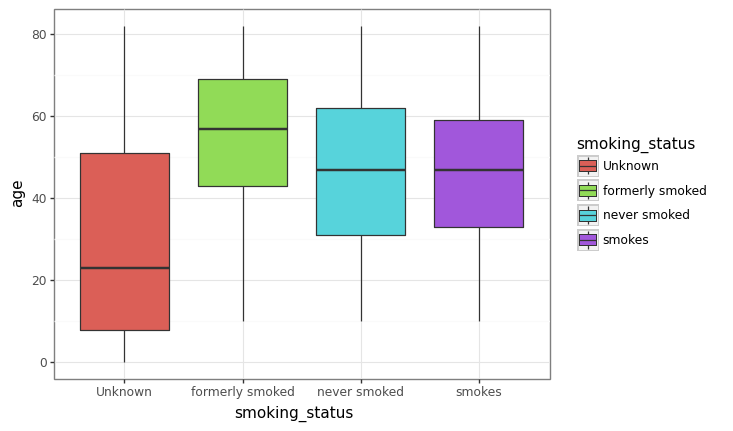

<ggplot: (8760276304430)>

In [ ]:
# Boxplot of age by smoking status
(ggplot(healthData, aes(x='smoking_status', y='age', fill='smoking_status'))
 + geom_boxplot()
 + theme_bw()
)


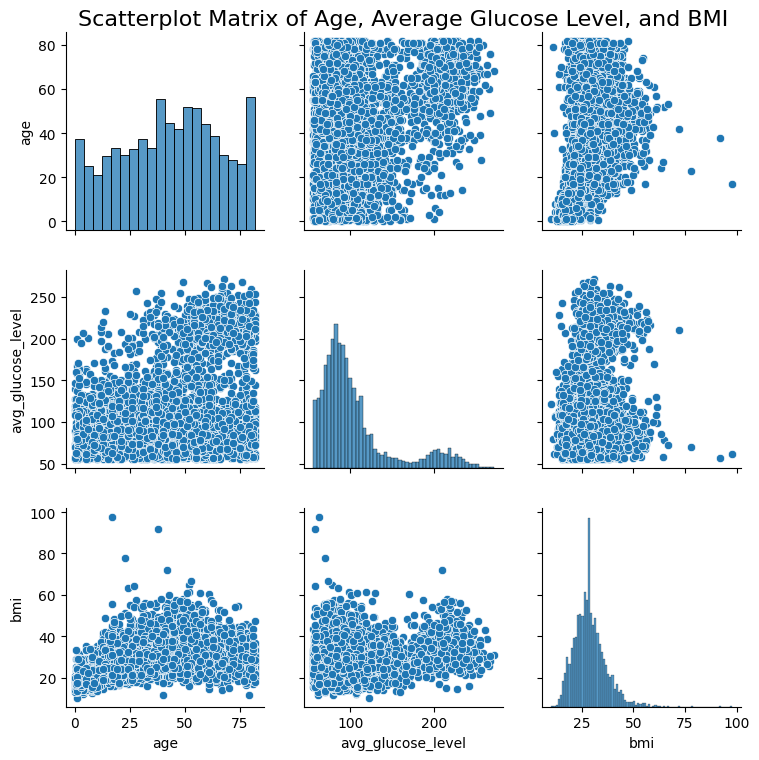

In [ ]:

# select the columns of interest and drop any rows with missing values
data = healthData[['age', 'avg_glucose_level', 'bmi']].dropna()

# generate scatterplot matrix with seaborn pairplot function
sns.pairplot(data)

# set axis labels and title
plt.suptitle('Scatterplot Matrix of Age, Average Glucose Level, and BMI', fontsize=16)
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, wspace=0.2, hspace=0.2)
plt.show()


In [ ]:
# basic statistic tests
# Gender and stroke frequency
print("\n")
print("Gender and stroke frequency\n")



Gender and stroke frequency



In [ ]:
# filter the data based on gender and select the gender and stroke columns
data = healthData.loc[healthData['gender'] != 'Other', ['gender', 'stroke']]

# create a cross-tabulation of gender and stroke columns
table = pd.crosstab(index=data['gender'], columns=data['stroke'])

# print the table
table


stroke,0,1
gender,,
Female,2853,141
Male,2007,108


In [ ]:
print("Fisher statistics \n")
# filter the data based on age and select the ever_married and stroke columns
data = healthData.loc[(healthData['age'] >= 35) & (healthData['age'] <= 50), ['ever_married', 'stroke']]

# create a contingency table of ever_married and stroke columns
table = pd.crosstab(index=data['ever_married'], columns=data['stroke'])

# perform Fisher's exact test
odds_ratio, p_value = fisher_exact(table)

# print the p-value
print(p_value)

Fisher statistics 

0.7367726377521217


In [ ]:
print("chi square test")
# create a contingency table of Residence_type and stroke columns
table = pd.crosstab(index=healthData['Residence_type'], columns=healthData['stroke'])

# perform chi-square test
statistic, p_value, dof, expected = chi2_contingency(table)

# print the p-value
print(p_value)

chi square test
0.29833169286876987


In [ ]:
healthData

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
# converting string into numerical value
numericHealthData = healthData.copy()
numericHealthData['gender'] = np.where(healthData['gender'] == 'Male', 1, np.where(healthData['gender'] == 'Female', 0, 2))
numericHealthData['ever_married'] = np.where(healthData['ever_married'] == 'Yes', 1, 0)
numericHealthData['work_type'] = np.where(healthData['work_type'] == 'children', 0, 
                                           np.where(healthData['work_type'] == 'Never_worked', 1, 
                                                    np.where(healthData['work_type'] == 'Private', 2, 
                                                             np.where(healthData['work_type'] == 'Govt_job', 3, 4))))
numericHealthData['Residence_type'] = np.where(healthData['Residence_type'] == 'Urban', 1, 0)
numericHealthData['smoking_status'] = np.where(healthData['smoking_status'] == 'never smoked', 0, 
                                               np.where(healthData['smoking_status'] == 'formerly smoked', 1, 
                                                        np.where(healthData['smoking_status'] == 'smokes', 2, 3)))

In [ ]:
numericHealthData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,4,0,202.21,28.893237,0,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,0,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,2,1
4,1665,0,79.0,1,0,1,4,0,174.12,24.000000,0,1


checking the correlations


<ipython-input-30-f875cbe031b8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

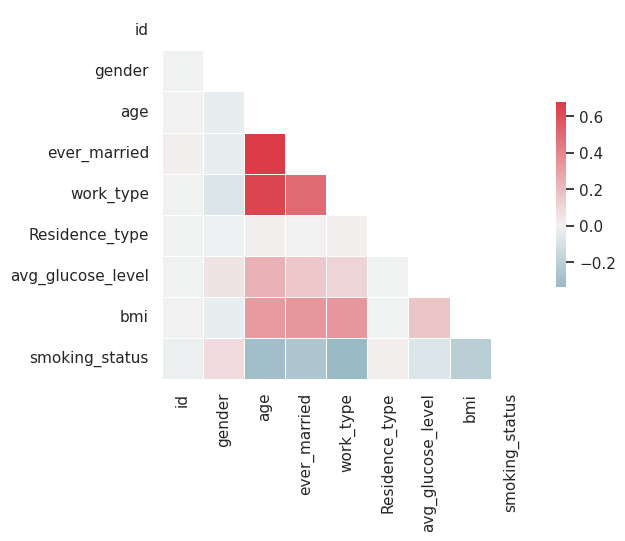

In [ ]:
print("checking the correlations")
# calculate the correlation matrix using Pearson's method
correlations = numericHealthData.corr(method='pearson', min_periods=1)

# create a correlation plot using seaborn library
sns.set(style='white')
mask = np.triu(np.ones_like(correlations, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlations, mask=mask, cmap=cmap, square=True, center=0, linewidths=0.5, cbar_kws={'shrink': 0.5})

In [ ]:
# drop id column
numericHealthData = numericHealthData.drop(columns=["id"])

In [ ]:
# data = numericHealthData[["age","hypertension","avg_glucose_level","heart_disease","smoking_status", "stroke"]]

In [ ]:
len(sample)

1138

In [ ]:
#splitting dataset into train and test
random.seed(1)

#use 70% of dataset as training set and 30% as test set
sample = [True if random.random() < 0.7 else False for i in range(len(numericHealthData))]
train = numericHealthData[sample]
test = numericHealthData[~np.array(sample)]

In [ ]:
print("Dimensions of train and test dataset are",train.shape, "and", test.shape)

Dimensions of train and test dataset are (3569, 11) and (1541, 11)


In [ ]:
x = numericHealthData.drop(columns='stroke')
y = numericHealthData.stroke

In [ ]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

In [ ]:
trainx, testx, trainy, testy = train_test_split(x_data, y_data, test_size=0.2)

In [ ]:
trainx['Stroke'] = trainy
testx['Stroke'] = testy

In [ ]:
trainx.dropna(inplace=True)
testx.dropna(inplace=True)

In [ ]:
trainX = trainx.drop(columns='Stroke')
testX = testx.drop(columns='Stroke')

trainY = trainx.Stroke
testY = testx.Stroke

In [ ]:
# scalar preprocessing
# Create a scalar object
scaler = StandardScaler()

# Fit the scalar object on the training data
scaler.fit(trainX)

# Transform the training and test data
X_train_scaled = scaler.transform(trainX)
X_test_scaled = scaler.transform(testX)


In [ ]:
# defining model
# stacking classifier
# Define the base classifiers
estimators = [('kn', KNeighborsClassifier(n_neighbors=2)), ('nb', GaussianNB()),
              ('rf', RandomForestClassifier(n_estimators=100))]

In [ ]:
# Define the meta-classifier
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [ ]:
# Fit the model
clf.fit(X_train_scaled, trainY)

StackingClassifier(estimators=[('kn', KNeighborsClassifier(n_neighbors=2)),
                               ('nb', GaussianNB()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
# testing with test data
predStacking = clf.predict(X_test_scaled)

In [ ]:
def measure_precision_recall(predict, actual_labels, name="Confusion Matrix"):
    a1 = confusion_matrix(predict, actual_labels)
    plt.matshow(a1, cmap=plt.cm.Greens)
    plt.colorbar()
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.title(name)
    plt.show()
    
    precision = precision_score(predict, actual_labels) 
    recall = recall_score(predict, actual_labels) 
    fmeasure = f1_score(predict, actual_labels) 
    
    print("\nResults")
    print(f'precision:  {precision * 100:.2f}%')
    print(f'recall:     {recall * 100:.2f}%')
    print(f'f-measure:  {fmeasure * 100:.2f}%')

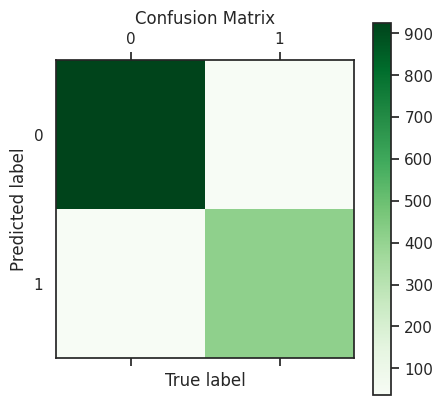


Results
precision:  91.76%
recall:     91.96%
f-measure:  91.86%


In [ ]:
measure_precision_recall(predStacking, testY)

In [ ]:
# defining KNN
knn = KNeighborsClassifier(n_neighbors=10, metric="minkowski", p=1)

In [ ]:
knn.fit(X_train_scaled,trainY)

KNeighborsClassifier(n_neighbors=10, p=1)

In [ ]:
predKnn = knn.predict(X_test_scaled)

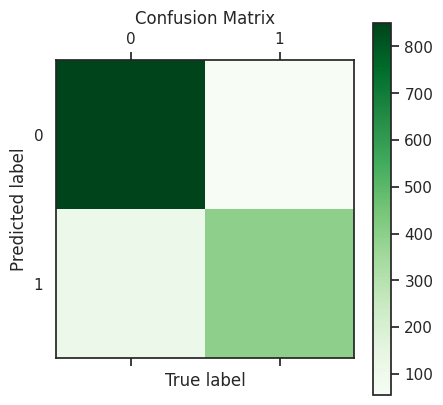


Results
precision:  87.75%
recall:     78.02%
f-measure:  82.60%


In [ ]:
measure_precision_recall(predKnn, testY)